In [17]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [18]:
%matplotlib inline

In [19]:
from pathlib import Path

import corner
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from scipy.stats import spearmanr

from relaxed import plot_defaults as plotdf
from relaxed.correlations import get_am_corrs
from relaxed.correlations import get_ma_corrs
from relaxed.correlations import vol_jacknife_err
from relaxed.cosmo import get_a_from_t
from relaxed.cosmo import get_fractional_tdyn
from relaxed.cosmo import get_t_from_a
from relaxed.fits import alpha_analysis
from relaxed.fits import get_early_late
from relaxed.gradients import get_savgol_grads
from relaxed.mah import get_an_from_am
from relaxed.mah import get_mah
from relaxed.models import opcam_dict
from relaxed.models import prepare_datasets
from relaxed.models import training_suite

In [36]:
mah_data = get_mah("../../data/processed/bolshoi_m12", cutoff_missing=0.05, cutoff_particle=0.05)

cat = mah_data["cat"]
am = mah_data["am"]
ma = mah_data['ma']
ma_peak = mah_data['ma_peak']
scales = mah_data['scales']
mass_bins = mah_data["mass_bins"]

t = get_t_from_a(scales) # in Gyrs
t0 = get_t_from_a(1) # in Gyrs

In [21]:
# load diffmah parameters
pars = np.load('../../data/processed/pbest_diffmah.npy')
logtc, ue, ul = pars[:, 0], pars[:, 1], pars[:, 2]
alpha_early, alpha_late = get_early_late(ue, ul)
tc = 10**logtc
cat.add_column(tc, name="tau_c")
cat.add_column(alpha_early, name="alpha_early")
cat.add_column(alpha_late, name="alpha_late")

In [22]:
# get diffmah curves
from relaxed.fits import alpha_diffmah
t = t.reshape(1, -1)
tc = tc.reshape(-1, 1)
alpha_early = alpha_early.reshape(-1, 1)
alpha_late = alpha_late.reshape(-1, 1)
curves = (t / t0) ** alpha_diffmah(t, tc, alpha_early, alpha_late)
t = t.reshape(-1)

/Users/imendoza/code/nbody-relaxed/relaxed/fits.py:62: RuntimeWarning: overflow encountered in exp
  return alpha_early + (alpha_late - alpha_early) / (1 + np.exp(-k * (t - tau_c)))


In [ ]:
# andrews way of getting curves

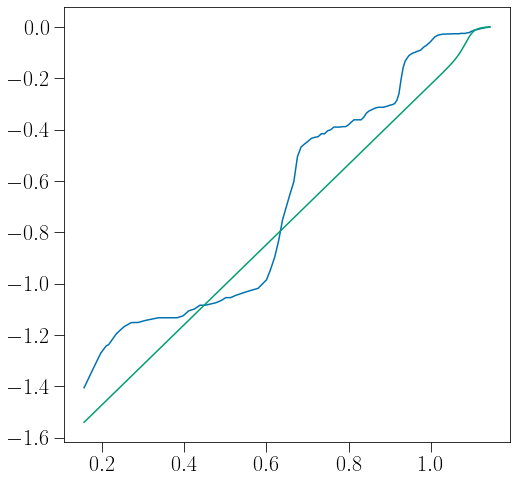

In [85]:
plt.figure(figsize=(8,8))
idx = np.random.randint(0, len(ma_peak))
plt.plot(np.log10(t), np.log10(ma_peak[idx, :]))
plt.plot(np.log10(t), np.log10(curves[idx, :]))

In [14]:
alpha_diffmah(t, cat['tau_c'], cat['alpha_early'], cat['alpha_late'])

ValueError: operands could not be broadcast together with shapes (165,) (10000,) 